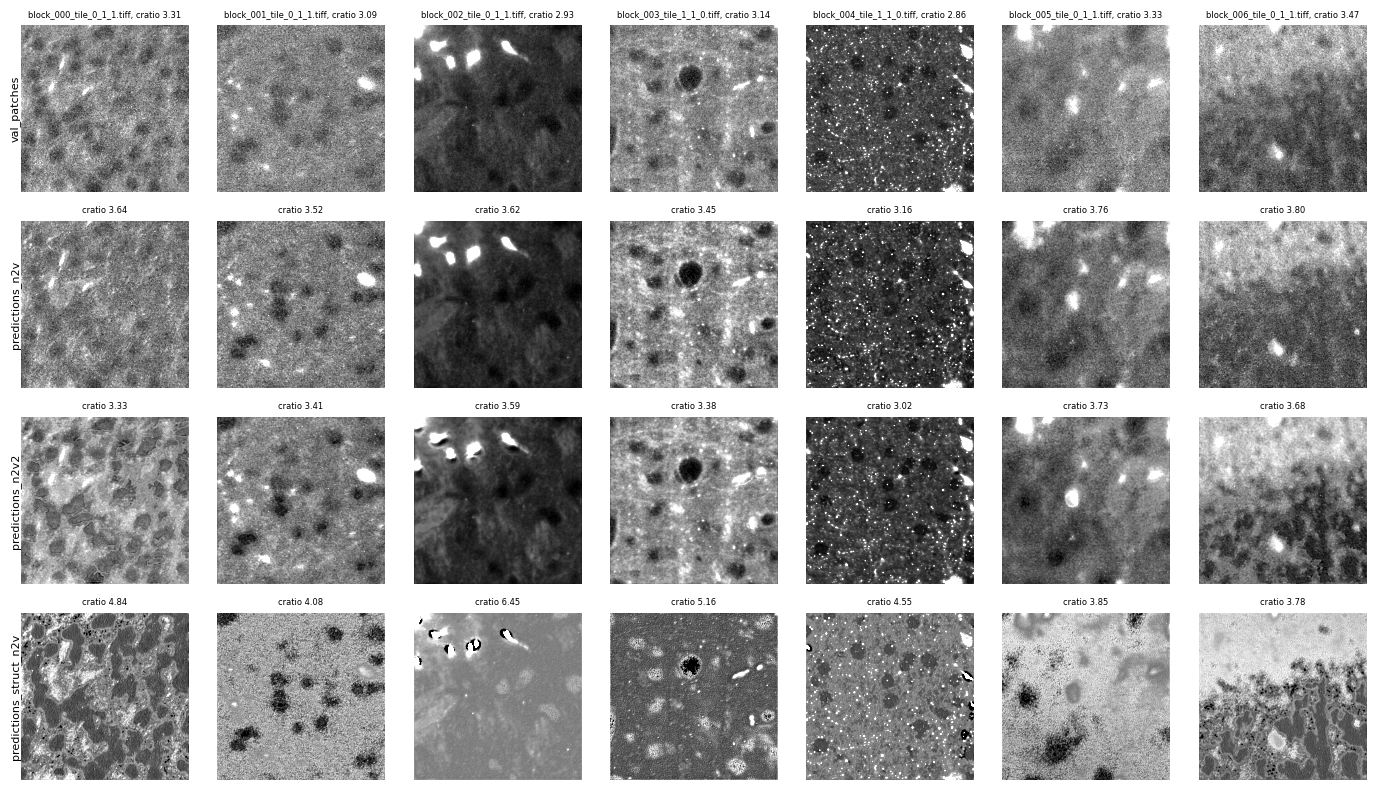

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
from numcodecs import blosc

results_dir = "/results"

models = ['val_patches', 'predictions_n2v', 'predictions_n2v2', 'predictions_struct_n2v']

# Assume the image filenames are the same in each model directory
# Get the list of image filenames from the first model directory
first_model_dir = os.path.join(results_dir, models[0])
image_names = sorted(os.listdir(first_model_dir))

# Create a figure with rows and columns based on the number of models and images
num_rows = len(models)
num_cols = len(image_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))

# If axes is 2D, ensure it's a NumPy array for consistent indexing
if num_rows == 1:
    axes = np.expand_dims(axes, axis=0)
if num_cols == 1:
    axes = np.expand_dims(axes, axis=1)
    
codec = blosc.Blosc(cname="zstd", clevel=5, shuffle=blosc.SHUFFLE)

for row_idx, model in enumerate(models):
    model_dir = os.path.join(results_dir, model)
    for col_idx, image_name in enumerate(image_names):
        image_path = os.path.join(model_dir, image_name)
        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            axes[row_idx, col_idx].axis('off')
            continue 
        img = imread(image_path).astype(np.uint16)
        encoded = codec.encode(img)
        ratio = img.nbytes / len(encoded)
        middle_slice = img[img.shape[0] // 2]
        ax = axes[row_idx, col_idx]
        ax.imshow(middle_slice, cmap='gray', vmin=np.percentile(middle_slice, 0.5), vmax=np.percentile(middle_slice, 98))
        ax.axis('off')
        if row_idx == 0:
            ax.set_title(f"{image_name}, cratio {ratio:.2f}", fontsize=6)
        else:
            ax.set_title(f"cratio {ratio:.2f}", fontsize=6)
    axes[row_idx, 0].text(0, 0.5, model, va='center', ha='right', rotation=90,
                          fontsize=8, transform=axes[row_idx, 0].transAxes)

plt.tight_layout()
plt.show()


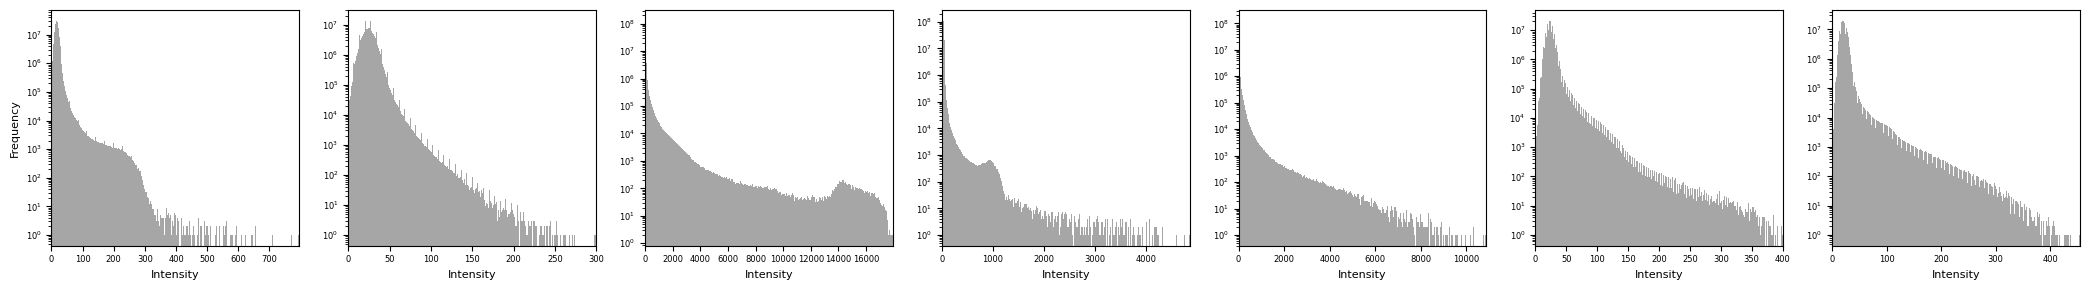

In [16]:

results_dir = "/data"

models = ['val_patches']

first_model_dir = os.path.join(results_dir, models[0])
image_names = sorted(os.listdir(first_model_dir))

num_rows = len(models)  # Multiply by 2 for image and histogram
num_cols = len(image_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))

for model_idx, model in enumerate(models):
    model_dir = os.path.join(results_dir, model)
    for col_idx, image_name in enumerate(image_names):
        image_path = os.path.join(model_dir, image_name)
        img = imread(image_path)
        
        # Plot the histogram
        ax_hist = axes[col_idx]
        ax_hist.hist(img.ravel(), bins=256, color='gray', alpha=0.7, log=True)
        ax_hist.set_xlim([0, img.max()])
        ax_hist.tick_params(axis='x', labelsize=6)
        ax_hist.tick_params(axis='y', labelsize=6)
        if model_idx == len(models) - 1:
            ax_hist.set_xlabel('Intensity', fontsize=8)
        if col_idx == 0:
            ax_hist.set_ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()
